In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("hls", 8)

cot = {
'4': [49.17608899,50.57288328,57.8519985,45.20916829,49.54712304,49.12787645,51.89981393,56.80393354,46.07572655,49.9137551,48.56039076,49.72959306,54.98117398,46.15358213,49.36397374,46.26247503,47.47363022,54.38686236,41.50386444,45.5660581,49.32094888],
'6': [45.82783875,44.42426425,42.35472864,41.53335094,44.29064126,45.0563287,50.56927468,43.76178505,37.06325305,39.18306916,42.91059321,43.48467375,41.31915515,40.95958471,47.20640713,42.64316045,41.0975532,39.01013972],
'8': [40.54313391,38.79126308,37.27382052,39.74838627,37.65792804,44.60771101,44.30899038,41.17856843,45.39741094,34.68042074,47.04520699,43.29785419,39.31088664,41.29022764,38.13669769,42.34122061,43.485102],
'10': [58.51767604,43.37938763,38.73978775,52.28310617,47.71445731,51.18189416,42.42874102,41.99477099,51.58631389,52.12246724,54.61335796,45.44339903,42.87221016,52.62136139,44.05041896],
'free': [50.1774318104,46.977616849,43.9055804523, 43.7874814446]
    }

#old free cot values..delete later
# [46.66940046,44.56659416,42.74373839,45.20260534,43.37389745,47.94368149,50.21013573,44.04949914,44.52912012,42.78161788,44.5379339]

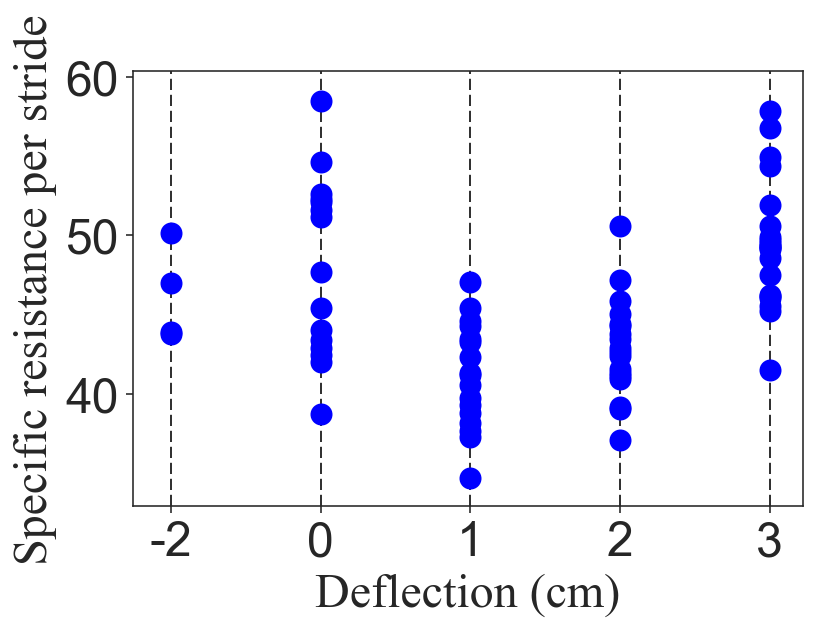

In [28]:
# plt.title("Cost of Transport/Stride for 4, 6, 8, 10, and 12cm (free)")
ax = plt.axes()
ax.xaxis.grid(True)
# plt.scatter([4]*len(cot['4']), cot['4'], s=100)
# plt.scatter([6]*len(cot['6']), cot['6'], s=100)
# plt.scatter([8]*len(cot['8']), cot['8'], s=100)
# plt.scatter([10]*len(cot['10']), cot['10'], s=100)
# plt.scatter([12]*len(cot['free']), cot['free'], s=100)
my_xticks=["-2","0","1","2","3"]
plt.scatter([3]*len(cot['4']), cot['4'], s=100, c='b')
plt.scatter([2]*len(cot['6']), cot['6'], s=100, c='b')
plt.scatter([1]*len(cot['8']), cot['8'], s=100, c='b')
plt.scatter([0]*len(cot['10']), cot['10'], s=100, c='b')
plt.scatter([-1]*len(cot['free']), cot['free'], s=100, c='b')
# plt.rc('grid', linestyle=":", color='black')
xfont = {'fontname':'Times New Roman'}
ax.set_ylabel("Specific resistance per stride",fontdict=xfont, fontsize=24)
ax.set_xlabel("Deflection (cm)",fontdict=xfont,fontsize=24)
ax.tick_params(axis='both', which='both', labelsize=24)
ax.set_xticks((-1,0,1,2,3))
ax.set_xticklabels(my_xticks)




In [13]:
def compute_std_error(dictionary):
    d = {}
    for k,v in dictionary.items():
        a = np.array(v)
        d[k] = stats.sem(a)
    return d

def compute_mean(dictionary):
    m = {}
    for k,v in dictionary.items():
        arr = np.array(v)
        m[k] = np.mean(arr)
    return m

In [14]:
std_errors = compute_std_error(cot)

In [15]:
std_errors

{'10': 1.4747747867897616,
 '4': 0.87379625550421403,
 '6': 0.74682653893790452,
 '8': 0.80361269530104551,
 'free': 1.5140640660938811}

In [16]:
means = compute_mean(cot)
print means

{'8': 41.123225239999996, '6': 42.927544544444437, '4': 49.499091446190469, 'free': 46.212027639074996, '10': 47.96995664666666}


In [6]:
cot2 = [[50.1774318104,46.977616849,43.9055804523,43.7874814446], [58.51767604,43.37938763,38.73978775,52.28310617,47.71445731,51.18189416,42.42874102,41.99477099,51.58631389,52.12246724,54.61335796,45.44339903,42.87221016,52.62136139,44.05041896], [40.54313391,38.79126308,37.27382052,39.74838627,37.65792804,44.60771101,44.30899038,41.17856843,45.39741094,34.68042074,47.04520699,43.29785419,39.31088664,41.29022764,38.13669769,42.34122061,43.485102], [45.82783875,44.42426425,42.35472864,41.53335094,44.29064126,45.0563287,50.56927468,43.76178505,37.06325305,39.18306916,42.91059321,43.48467375,41.31915515,40.95958471,47.20640713,42.64316045,41.0975532,39.01013972], [49.17608899,50.57288328,57.8519985,45.20916829,49.54712304,49.12787645,51.89981393,56.80393354,46.07572655,49.9137551,48.56039076,49.72959306,54.98117398,46.15358213,49.36397374,46.26247503,47.47363022,54.38686236,41.50386444,45.5660581,49.32094888]]
cot2_index_map = ["free", "0", "1", "2", "3"]
df = pd.DataFrame(columns=["Deflection", "Specific resistance per stride"])

i = 0
for j in xrange(len(cot2)):
    for v in cot2[j]:
        df.loc[i] = [cot2_index_map[j], v]
        i += 1

df["Specific resistance per stride"] = pd.to_numeric(df["Specific resistance per stride"])




In [7]:
print df

   Deflection  Specific resistance per stride
0        free                       50.177432
1        free                       46.977617
2        free                       43.905580
3        free                       43.787481
4           0                       58.517676
5           0                       43.379388
6           0                       38.739788
7           0                       52.283106
8           0                       47.714457
9           0                       51.181894
10          0                       42.428741
11          0                       41.994771
12          0                       51.586314
13          0                       52.122467
14          0                       54.613358
15          0                       45.443399
16          0                       42.872210
17          0                       52.621361
18          0                       44.050419
19          1                       40.543134
20          1                     

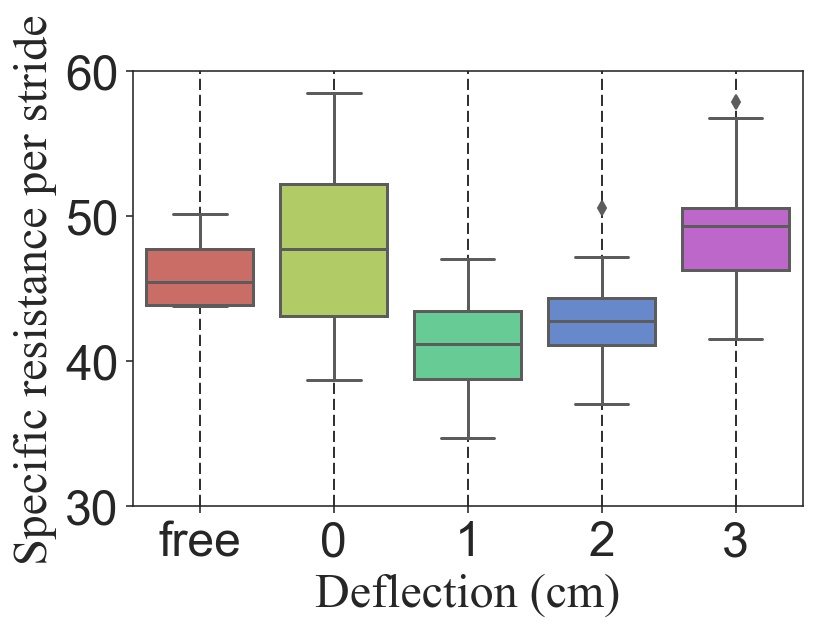

In [8]:
# g = sns.boxplot(x="Deflection", y="Specific resistance per stride", kind="box", data=df, height=6, aspect=1)
# g.ax.tick_params(axis='both', which='both', labelsize=24)
# g.ax.set_ylabel("Specific resistance per stride",fontdict=xfont, fontsize=24)
# g.ax.set_xlabel("Deflection (cm)",fontdict=xfont,fontsize=24)
# [i.set_linewidth(1.25) for i in g.ax.spines.itervalues()]
xfont = {'fontname':'Times New Roman'}
ax = sns.boxplot(x="Deflection", y="Specific resistance per stride", data=df, palette="hls")
ax.tick_params(axis='both', which='both', labelsize=24)
ax.set_ylabel("Specific resistance per stride",fontdict=xfont, fontsize=24)
ax.set_xlabel("Deflection (cm)",fontdict=xfont,fontsize=24)
ax.xaxis.grid(True)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(30, end + 10, 10))